# Bank Marketing Data Set 

Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
%matplotlib inline

** Importing Libraries **

In [2]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import sklearn.linear_model as linear
import random
sns.set(style="darkgrid")
import os,sys
import xlrd
import math
from pandas.tools.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
import datetime
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import pylab as p
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
import pydotplus
from IPython.display import Image  
import pydotplus
from io import BytesIO as StringIO
import graphviz
import copy
from copy import deepcopy
from sklearn import cross_validation
from numpy import random as np_random
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model



/Users/admin/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Start of  ETL 


In [1]:
import pandas as pd

In [4]:
dataframe = pd.read_csv( "bank-additional-full.csv", sep=";")
print dataframe.info()
dataframe.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# The columns

In [5]:
dataframe.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

### 3. Conducting  EDA on the raw data. What conclusions did I reach?

In [6]:
def examine_data_frame( df):
    for name in df.columns:
        print "----------"
        print df[ name].dtype
        if df[ name].dtype is np.dtype( 'O'):
            print df[ name].value_counts()
            print "Name: ", name
        else:
            print df[ name].describe()

examine_data_frame(dataframe)

----------
int64
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
----------
object
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Name:  job
----------
object
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Name:  marital
----------
object
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Name:  education
----------
object
no         3

In [7]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
data_1 = dataframe[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, dataframe], axis=1)
result_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
result_df.columns.values # Performed one-hot encoding so that I can use it in EDA

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pout

In [9]:
result_df['output'] = result_df['y'].apply(lambda x: 1 if x =='yes' else 0)

### 1) Comparing Qualitative vs. Quantitative Analysis

#### 1.1  Number of employees vs. Output

In [10]:
grouped = result_df.groupby( "y")
nr_employed = grouped[ "nr.employed"].describe()
nr_employed = nr_employed.unstack( level=-1)
print nr_employed


       count         mean        std     min     25%     50%     75%     max
y                                                                           
no   36548.0  5176.166600  64.571979  4963.6  5099.1  5195.8  5228.1  5228.1
yes   4640.0  5095.115991  87.572641  4963.6  5017.5  5099.1  5191.0  5228.1


#### Conclusion:
1. Number of employess (mean) is less for output-yes which suggests that higher number of employees have negative impact on output

#### 1.2 Pdays vs. output

In [11]:
grouped = result_df.groupby( "y")
pdays = grouped[ "pdays"].describe()
pdays = pdays.unstack( level=-1)
print pdays


       count        mean         std  min    25%    50%    75%    max
y                                                                    
no   36548.0  984.113878  120.656868  0.0  999.0  999.0  999.0  999.0
yes   4640.0  792.035560  403.407181  0.0  999.0  999.0  999.0  999.0


#### Conclusion:
1. PDays (mean) is less for output-yes which suggests that higher higher 'pdays' have negative impact on output, which makes sense. Higher 'pdays' 
i.e. more number of days that passed by after the client was last contacted from a previous campaign, lesser will be chances for bank trem deposits

#### 2 Qualitative vs. Qualitative

####  2.1 Month vs. Output

y            no       yes
month                    
apr    0.050816  0.013086
aug    0.134092  0.015903
dec    0.002258  0.002161
jul    0.158420  0.015757
jun    0.115543  0.013572
mar    0.006555  0.006701
may    0.312785  0.021511
nov    0.089468  0.010100
oct    0.009784  0.007648
sep    0.007624  0.006215


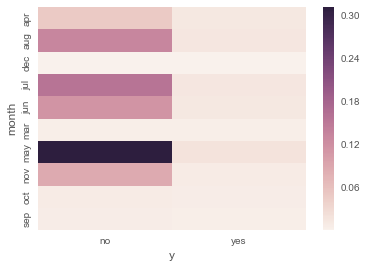

In [12]:
frequencies = pd.crosstab( result_df[ "month"], result_df[ "y"]).apply(lambda r: r/len(result_df))
print frequencies

sns.heatmap( frequencies)

### Conclusion:

1. Month of May, Jun, July, August & November have negative impact on the output

### 4.This is a binary classification task. Picking  an appropriate evaluation metric and explain to me the pros and cons.

1. It really depends on "goal" and dataset. Classification Accuracy (or misclassification error) makes sense if your class labels are uniformly distributed. Even better, we can compute the ROC area under the curve (even for multi-class sytems)

2. Similarly, we can generalize all the binary performance metrics such as precision, recall, and F1-score etc. to multi-class settings. 

3. I have selected accurary to be the evaluation metric, since at this point true cost (of misclassification) of false positive or false negatives are not known.

4. Cons can be precision, recall or other metrics could be more important for business impact.



### 5. Using  Decision Tree. Build a model using three rounds of 10 fold cross validation or 30 repetitions of bootstrap sampling with 90/10 splits to gauge the generalization error of your model using the evaluation metric you picked.

In [13]:
def error_rate(true_class_data, prediction_model_data):
    fp=0.0
    fn=0.0
    for t, p in zip(true_class_data, prediction_model_data):
        if t==0 and p==1:
            fp=fp+1
        elif t==1 and p==0:
            fn=fn+1
    return (fp+fn)/len(true_class_data)

def cross_validate_10_fold( X, y, model):
    ret_scores=[]
    data
    for n in xrange(3):
        model = tree.DecisionTreeClassifier(class_weight="balanced").fit( X, y)

        # Evaluate the models using crossvalidation
        scores = 1-cross_validation.cross_val_score(model, X, y, scoring="accuracy", cv=10)
        for s in scores:
            ret_scores.append(s)
    sample_thetas=non_param_bootstrap(scores, 10000)
    ci=stats.mstats.mquantiles( sample_thetas, [0.05, 0.95])
    return ci

def resample( data):
    n = len( data)
    return [ data[ i] for i in [np_random.randint(0, n - 1) for _ in xrange( 0, n)]]

def non_param_bootstrap(original_data, num_sampling):
    return np.array( [np.mean( sample) for sample in [resample(original_data) for i in xrange( 0, num_sampling)]])

In [14]:
result_df2 = result_df[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'output']]
y = result_df2['output'].values
X = result_df2[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].values

In [15]:
np_random.seed(1)
ret_scores=[]

for n in xrange(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = tree.DecisionTreeClassifier(class_weight = "balanced").fit( X_train, y_train)
    
    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(model, X_test, y_test, scoring="accuracy", cv =10)
    for s in scores:
        ret_scores.append(s)
sample_thetas_1=non_param_bootstrap(scores, 10000)
ci_1=stats.mstats.mquantiles( sample_thetas_1, [0.05, 0.95])

In [16]:
print 'Accuracy for DecisionTreeClassifier:', np.mean(sample_thetas_1), ci_1

Accuracy for DecisionTreeClassifier: 0.830836758229 [ 0.82124831  0.83996544]


### 6. Using all the data, learn the Decision Tree and plot/visualize it. Does it make sense?


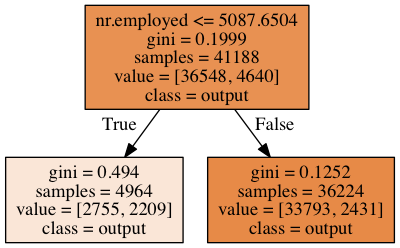

In [17]:
clf = tree.DecisionTreeClassifier(max_depth =1)
clf.fit(X,y)

tree.export_graphviz(clf,out_file='mytree.dot')

features = ['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = ['output']

out = StringIO()
tree.export_graphviz(clf, out_file = out,feature_names=features,  
                         class_names=target,filled=True)
 
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

### Conclusion:

1. Tree splits on number of emplyees 5000, which suggests that if number of employees is >5000, then there are high chances that term deposit will not be opened

#  Using Logistic Regression

Repeat your model building exercise with logistic regression. This will require various transformations either because many of the categorical variables are not binary or some of the numerical variables may not work "out of the box".

In [18]:
result_df['pdays'] = result_df['pdays'].apply(lambda x: 0 if x ==999 else x) # to remove 999

In [19]:
result_df.rename(columns={'education_basic.4y': 'education_basic_4y', 'education_basic.6y':'education_basic_6y', 
                         'education_basic.9y': 'education_basic_9y',
                         'education_high.school': 'education_high_school',
                         'education_professional.course': 'education_professional_course',
                         'education_university.degree': 'education_university_degree',
                         'log_emp.var.rate': 'log_emp_var_rate',
                         'cons.price.idx': 'cons_price_idx',
                         'cons.conf.idx': 'cons_conf_idx',
                         'log_nr.employed': 'log_nr_employed',
                         'job_self-employed': 'job_self_employed',
                         'job_blue-collar': 'job_blue_collar',
                         'nr.employed': 'nr_employed'}, inplace=True)


### NOTE :
I have implemented two data manipulations before fitting logistic regression code:
1. Implemented class balancing since 90% is 'no' and 10% 'yes'

*** 2. Use standard scalar to scale all the variables since we have high dimentionality & I have used l2_regularized logistic regression ***

In [34]:
result_df2 = result_df[['job_admin.', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic_4y', 'education_basic_6y',
       'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age',
       'cons_price_idx', 'cons_conf_idx',
       'campaign', 'pdays', 'previous',
       'euribor3m', 'nr_employed','output']]
y = result_df2['output'].values
X = result_df2[['job_admin.', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic_4y', 'education_basic_6y',
       'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 
       'cons_price_idx', 'cons_conf_idx',
       'campaign', 'pdays', 'previous',
       'euribor3m', 'nr_employed']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

lr_clf = LogisticRegression(penalty='l2', C=0.05, class_weight="balanced") # get object, the 'C' value is less 
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,result_df2.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0]), reverse = True) # sort them by the magnitude of the weight
print "Most important features.."
for coef, name in zip_vars:
    print name, 'has weight of', coef[0] # now print them out
print    
# Determine the false positive and true positive rates
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print 'accuracy:', acc 
print "Confusion matrix : "
print conf
print
print "Classification Report.."
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))



Most important features..
nr_employed has weight of -0.74420800086
month_may has weight of -0.249668914717
poutcome_success has weight of 0.202762404037
month_jun has weight of 0.150765917551
poutcome_failure has weight of -0.146983316092
month_jul has weight of 0.140986757101
month_mar has weight of 0.129459492858
campaign has weight of -0.119171520079
cons_conf_idx has weight of 0.10701504875
contact_telephone has weight of -0.0944062118242
contact_cellular has weight of 0.0944062118242
day_of_week_mon has weight of -0.0681975231614
job_retired has weight of 0.0672963012841
pdays has weight of 0.0660414943094
month_nov has weight of -0.0634730639914
month_oct has weight of 0.0615705716641
month_apr has weight of 0.0518075114483
day_of_week_wed has weight of 0.049089821707
default_no has weight of 0.0395382277496
default_yes has weight of -0.0394893691291
job_student has weight of 0.0386957291233
default_unknown has weight of -0.0386697895871
month_sep has weight of -0.0372135160354
e

Plot of most important features...


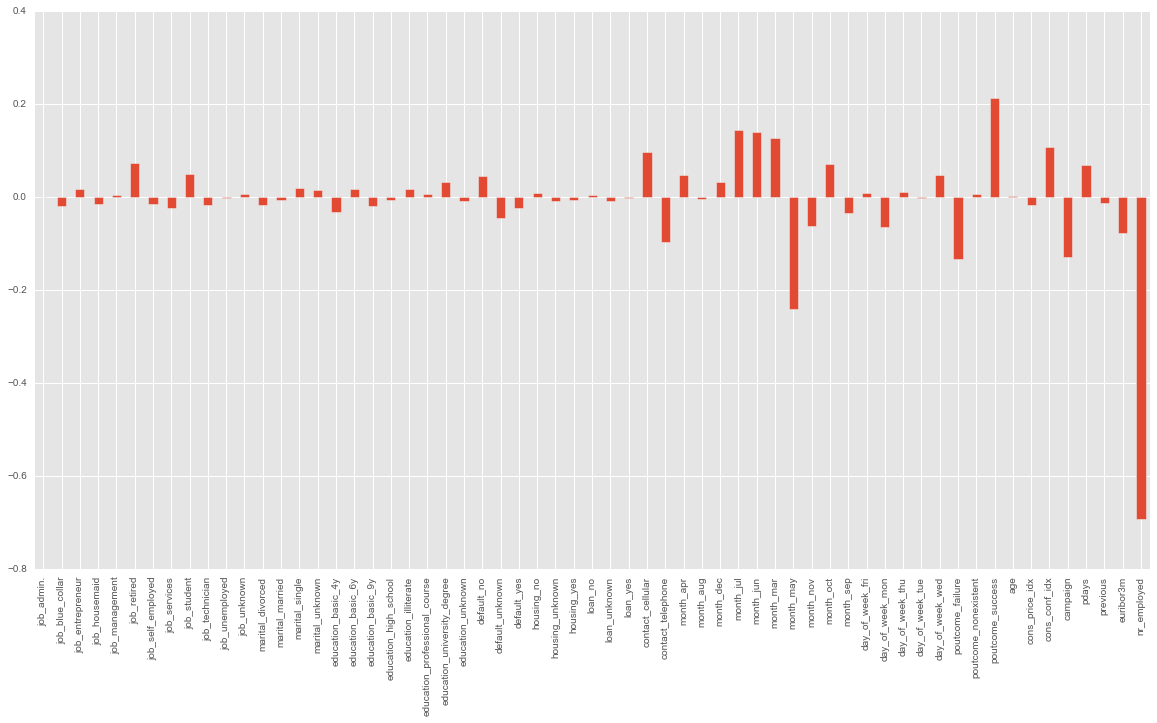

In [30]:
print "Plot of most important features..."
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt

%matplotlib inline
figure = plt.figure(figsize=(20, 10))

plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0], index = ['job_admin.', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self_employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic_4y', 'education_basic_6y',
       'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 
       'cons_price_idx', 'cons_conf_idx',
       'campaign', 'pdays', 'previous',
       'euribor3m', 'nr_employed'])
weights.plot(kind='bar')

plt.show()

### 2. Repeat the cross-validation using the same approach you picked earlier. Was the Decision Tree or Logistic Regression more accurate? 

In [22]:
np_random.seed(1)
ret_scores=[]
for n in xrange(3):
  
    model = lr_clf.fit(X_train_scaled,y_train)
    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(model, X_test_scaled, y_test, scoring="accuracy", cv=10)
    for s in scores:
        ret_scores.append(s)
sample_thetas_1=non_param_bootstrap(scores, 10000)
ci_1=stats.mstats.mquantiles( sample_thetas_1, [0.05, 0.95])

In [23]:
print 'Accuracy for Logistic Regression:', np.mean(sample_thetas_1), ci_1

Accuracy for Logistic Regression: 0.816595194175 [ 0.80800971  0.825     ]


#### Conclusion:
Decision tree model was more accurate

### 4.Build a logistic regression model using all of the data and the bootstrap LM. Interpret the coefficients.

## Important Assumptions for this logistic regression:

 **I decided to scale the variables since I have decided to use l2 regularization due to high dimensionality in the data since we are selection most important**
 
If we are using L1 regularization then we are caring about feature-selection, as that is it’s main power. It reduces the complexity of the learned model by causing some features being ignored completely, which is called sparsity. As an aside, but since you mention it, L2 regularization isn’t really strong for feature-selection but rather tries to reduce the complexity of the model by preventing very large weighting on features.

To answer your question… By using L1-regularization you are already giving some thought to automatic feature-selection. The real question is: should you care more about feature selection? That depends on your problem, how much time you have and your experience-level.

If you do use L1-regularization and you know what the features mean then it’s good practice to look at the resulting weights to see what features were selected/ignored. Check how sane this is: in particular look to see if it turned off any features that you know (or believe) should be important. If so, you may need to look at proper scaling, or feature-engineering techniques involving combinations of the existing features.

In [31]:
def logm( formula, data=None):
    if data is None:
        raise ValueError( "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")

    result = {}
    result[ "formula"] = formula
    result[ "n"] = data.shape[ 0]

    from sklearn.preprocessing import StandardScaler


    y, X = patsy.dmatrices( formula, data, return_type="matrix")
    y = np.ravel( y)
    
    # scale attributes by the training set
    scl_obj = StandardScaler()
    scl_obj.fit(X) # find scalings for each column that make this zero mean and unit std
    X_scaled = scl_obj.transform(X) # apply to training
    
    model = linear.LogisticRegression( penalty='l2', class_weight = "balanced").fit( X_scaled, y)

    result[ "coefficients"] = model.coef_[ 0]

    y_hat = model.predict( X)
    result[ "residuals"] = y - y_hat
    
    n = len( result[ "residuals"])
    k = len( result[ "coefficients"])
    
    return result

def bootstrap_logm( formula, data=None, samples=100):
    if data is None:
        raise ValueError( "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    
    bootstrap_results = {}
    bootstrap_results[ "formula"] = formula

    variables = map( lambda x: x.strip(), formula.split("~")[1].split( "+"))
    variables = ["intercept"] + variables
    bootstrap_results[ "variables"] = variables
    
    coeffs = []
    sigmas = []
    rs = []

    n = data.shape[ 0]
    bootstrap_results[ "n"] = n
    
    for i in xrange( samples):
        sampling_indices = [ i for i in [random.randint(0, n - 1) for _ in xrange( 0, n)]]
        sampling = data.loc[ sampling_indices]
        
        results = logm( formula, data=sampling)
        coeffs.append( results[ "coefficients"])
    
    coeffs = pd.DataFrame( coeffs, columns=variables)

    bootstrap_results[ "resampled_coefficients"] = coeffs
    
    result = logm( formula, data=data)
    
    bootstrap_results[ "residuals"] = result[ "residuals"]
    bootstrap_results[ "coefficients"] = result[ "coefficients"]
    return bootstrap_results

def describe_bootstrap_fit( result):
    print "regression: ", result[ "formula"]
    print "n: ", result[ "n"]
    print "----------"
    
    
    bounds = result[ "resampled_coefficients"].quantile([0.025, 0.975])
    bounds = bounds.transpose()
    bounds = bounds.values.tolist()
    
    coeffs = result["coefficients"]
    

    for variable, coefficient, bound in zip( result[ "variables"], result["coefficients"], bounds):
        print variable + ": ", coefficient, bound
    return coeffs

In [32]:
result=bootstrap_logm('output~age+campaign+pdays+previous+euribor3m+nr_employed+cons_price_idx+ cons_conf_idx +job_blue_collar+job_entrepreneur+job_housemaid +job_management +job_retired+job_self_employed + job_services + job_student +job_technician + job_unemployed +job_unknown +marital_divorced + marital_married + marital_single + marital_unknown +education_basic_4y +education_basic_6y+education_basic_9y + education_high_school +education_illiterate +education_professional_course +education_university_degree + education_unknown + default_yes + housing_yes + loan_yes+contact_cellular +month_apr+month_aug+ month_dec + month_jul+ month_jun+month_mar+month_may+month_nov+month_oct+month_sep+ day_of_week_fri+day_of_week_mon+day_of_week_thu+day_of_week_tue+day_of_week_wed+poutcome_success', result_df)
coefficients = describe_bootstrap_fit(result)


regression:  output~age+campaign+pdays+previous+euribor3m+nr_employed+cons_price_idx+ cons_conf_idx +job_blue_collar+job_entrepreneur+job_housemaid +job_management +job_retired+job_self_employed + job_services + job_student +job_technician + job_unemployed +job_unknown +marital_divorced + marital_married + marital_single + marital_unknown +education_basic_4y +education_basic_6y+education_basic_9y + education_high_school +education_illiterate +education_professional_course +education_university_degree + education_unknown + default_yes + housing_yes + loan_yes+contact_cellular +month_apr+month_aug+ month_dec + month_jul+ month_jun+month_mar+month_may+month_nov+month_oct+month_sep+ day_of_week_fri+day_of_week_mon+day_of_week_thu+day_of_week_tue+day_of_week_wed+poutcome_success
n:  41188
----------
intercept:  0.0 [0.0, 0.0]
age:  -0.0119019903755 [-0.04963829935238667, 0.023462673160025982]
campaign:  -0.117572970299 [-0.17064820898127994, -0.074278593445745]
pdays:  0.0811885141838 [0.04

### Explain all the coeficients

In [33]:
print 'For every unit of age increase, the probability of Y changes by %.2f%%'%(((coefficients[1]/4))*100)
print 'For every unit of campaign increase, the probability of Y changes by %.2f%%'%(((coefficients[2]/4))*100)
print 'For every unit of pdays increase, the probability of Y changes by %.2f%%'%(((coefficients[3]/4))*100)
print 'For every unit of previous increase, the probability of Y changes by %.2f%%'%(((coefficients[4]/4))*100)
print 'For every unit of euribor3m increase, the probability of Y changes by %.2f%%'%((coefficients[5]/4)*100)
print 'For every unit of nr_employed increase, the probability of Y changes by %.2f%%'%((coefficients[6]/4)*100)
print 'For every unit of cons_price_idx increase, the probability of Y changes by %.2f%%'%((coefficients[7]/4)*100)
print 'For every unit of cons_conf_idx increase, the probability of Y changes by %.2f%%'%((coefficients[8]/4)*100)
print 'For every unit of job_blue_collar increase, the probability of Y changes by %.2f%%'%((coefficients[9]/4)*100)
print 'For every unit of job_entrepeneur increase, the probability of Y changes by %.2f%%'%((coefficients[10]/4)*100)
print 'For every unit of job_housemaid increase, the probability of Y changes by %.2f%%'%((coefficients[11]/4)*100)
print 'For every unit of job_management increase, the probability of Y changes by %.2f%%'%((coefficients[12]/4)*100)
print 'For every unit of job_retired increase, the probability of Y changes by %.2f%%'%((coefficients[13]/4)*100)
print 'For every unit of job_selfemployed increase, the probability of Y changes by %.2f%%'%((coefficients[14]/4)*100)
print 'For every unit of job_services increase, the probability of Y changes by %.2f%%'%((coefficients[15]/4)*100)
print 'For every unit of job_student increase, the probability of Y changes by %.2f%%'%((coefficients[16]/4)*100)
print 'For every unit of job_technician increase, the probability of Y changes by %.2f%%'%((coefficients[17]/4)*100)

print 'For every unit of job_umemployed increase, the probability of Y changes by %.2f%%'%(((coefficients[18]/4))*100)
print 'For every unit of job_unknown increase, the probability of Y changes by %.2f%%'%(((coefficients[19]/4))*100)
print 'For every unit of martial_divorced increase, the probability of Y changes by %.2f%%'%(((coefficients[20]/4))*100)
print 'For every unit of martial_married increase, the probability of Y changes by %.2f%%'%((coefficients[21]/4)*100)
print 'For every unit of martial_single increase, the probability of Y changes by %.2f%%'%((coefficients[22]/4)*100)
print 'For every unit of martial_unknown increase, the probability of Y changes by %.2f%%'%((coefficients[23]/4)*100)
print 'For every unit of education_basic_4y increase, the probability of Y changes by %.2f%%'%((coefficients[24]/4)*100)
print 'For every unit of education_basic_6y increase, the probability of Y changes by %.2f%%'%((coefficients[25]/4)*100)
print 'For every unit of education_basic_9y increase, the probability of Y changes by %.2f%%'%((coefficients[26]/4)*100)
print 'For every unit of education_basic_highschool increase, the probability of Y changes by %.2f%%'%((coefficients[27]/4)*100)
print 'For every unit of education_basic_illeterate increase, the probability of Y changes by %.2f%%'%((coefficients[28]/4)*100)
print 'For every unit of education_basic_profcourse increase, the probability of Y changes by %.2f%%'%((coefficients[29]/4)*100)
print 'For every unit of education_basic_univdegree increase, the probability of Y changes by %.2f%%'%((coefficients[30]/4)*100)
print 'For every unit of education_unknown increase, the probability of Y changes by %.2f%%'%((coefficients[31]/4)*100)
print 'For every unit of default_yes increase, the probability of Y changes by %.2f%%'%((coefficients[32]/4)*100)
print 'For every unit of housing_yes increase, the probability of Y changes by %.2f%%'%((coefficients[33]/4)*100)

print 'For every unit of loan_yes increase, the probability of Y changes by %.2f%%'%((coefficients[34]/4)*100)
print 'For every unit of contact_cellular increase, the probability of Y changes by %.2f%%'%((coefficients[35]/4)*100)
print 'For every unit of month_apr increase, the probability of Y changes by %.2f%%'%((coefficients[36]/4)*100)
print 'For every unit of month_aug increase, the probability of Y changes by %.2f%%'%((coefficients[37]/4)*100)
print 'For every unit of month_dec increase, the probability of Y changes by %.2f%%'%((coefficients[38]/4)*100)
print 'For every unit of month_jul increase, the probability of Y changes by %.2f%%'%((coefficients[39]/4)*100)
print 'For every unit of month_jun increase, the probability of Y changes by %.2f%%'%((coefficients[40]/4)*100)
print 'For every unit of month_mar increase, the probability of Y changes by %.2f%%'%((coefficients[41]/4)*100)
print 'For every unit of month_may increase, the probability of Y changes by %.2f%%'%((coefficients[42]/4)*100)


print 'For every unit of month_nov increase, the probability of Y changes by %.2f%%'%((coefficients[43]/4)*100)
print 'For every unit of month_oct increase, the probability of Y changes by %.2f%%'%((coefficients[44]/4)*100)
print 'For every unit of month_sept increase, the probability of Y changes by %.2f%%'%((coefficients[45]/4)*100)
print 'For every unit of day_of_week_fri increase, the probability of Y changes by %.2f%%'%((coefficients[46]/4)*100)
print 'For every unit of day_of_week_mon increase, the probability of Y changes by %.2f%%'%((coefficients[47]/4)*100)
print 'For every unit of day_of_week_thurs increase, the probability of Y changes by %.2f%%'%((coefficients[48]/4)*100)

print 'For every unit of day_of_week_tues increase, the probability of Y changes by %.2f%%'%((coefficients[49]/4)*100)
print 'For every unit of day_of_week_wed increase, the probability of Y changes by %.2f%%'%((coefficients[50]/4)*100)
print 'For every unit of p_outcome_success increase, the probability of Y changes by %.2f%%'%((coefficients[51]/4)*100)



For every unit of age increase, the probability of Y changes by -0.30%
For every unit of campaign increase, the probability of Y changes by -2.94%
For every unit of pdays increase, the probability of Y changes by 2.03%
For every unit of previous increase, the probability of Y changes by -3.40%
For every unit of euribor3m increase, the probability of Y changes by 6.55%
For every unit of nr_employed increase, the probability of Y changes by -24.71%
For every unit of cons_price_idx increase, the probability of Y changes by -2.55%
For every unit of cons_conf_idx increase, the probability of Y changes by 1.49%
For every unit of job_blue_collar increase, the probability of Y changes by -0.99%
For every unit of job_entrepeneur increase, the probability of Y changes by 0.16%
For every unit of job_housemaid increase, the probability of Y changes by -0.46%
For every unit of job_management increase, the probability of Y changes by -0.11%
For every unit of job_retired increase, the probability of 

### 4. Which model is easier to interpret, Decision Tree or Logistic Regression? Why?



Decision tree is easier to inpterpret as it exhibits the most important features on which tree splits



### 5. Imagine you had to build a system that evaluated 10,000 of these a minute. Which system would you rather deploy into production? Why? Consider support, stakeholder buy-in, engineering infrastructure, etc.


Both algorithms are really fast. There isn't much to distinguish them in terms of run-time.

Logistic regression will work better if there's a single decision boundary, not necessarily parallel to the axis.

Decision trees can be applied to situations where there's not just one underlying decision boundary, but many, and will work best if the class labels roughly lie in hyper-rectangular regions.


### I would select logistic regression because:
Logistic regression is intrinsically simple, it has low variance and so is less prone to over-fitting. 

Decision trees can be scaled up to be very complex, are are more liable to over-fit. Pruning is applied to avoid this.